# Tutorial on Data Preprocessing (US Wildfires)

In this lesson, we will go through an example of how to do initial exploratory data analysis and data preprocessing for machine learning. To do this, we will use a data set of US Wildfires from 1990 - 2016. This data set includes the location and time of 50,000 recent wildfires, as well as information about the type of vegetation and co-located meteorological data during the time when the fires occurred. It is a subset of a much larger data set of 1.8 million US Wildfires.

The data set is available on Kaggle: [US Wildfires and other attributes](https://www.kaggle.com/datasets/capcloudcoder/us-wildfire-data-plus-other-attributes?select=Wildfire_att_description.txt)

We'll start by downloading the data set and then we will explore the variables in the data set and pre-process the data for use with machine learning using `pandas` and the `sci-kit learn` python packages.

## Download the data set

In [1]:
# To facilitate downloading data from Kaggle, we can install this python package
!pip install kagglehub

In [2]:
import kagglehub
import os

In [3]:
datapath = kagglehub.dataset_download("capcloudcoder/us-wildfire-data-plus-other-attributes")

print("Path to dataset files:", datapath)

Path to dataset files: /Users/karalamb/.cache/kagglehub/datasets/capcloudcoder/us-wildfire-data-plus-other-attributes/versions/4


In [4]:
os.listdir(datapath)

['FW_Veg_Rem_Combined.csv', 'Wildfire_att_description.txt']

The data set that we downloaded contains two files. The first is a csv that includes the variables and data, and the txt file provides metadata that described the variables that are contained in the csv file. We will start by loading and printing the metadata from the txt file.

In [5]:
with open(os.path.join(datapath,'Wildfire_att_description.txt'), 'r') as file:
    content = file.read()
print(content)

fire_name            ,Name of Fire
fire_size           ,Size of Fire 
fire_size_class      ,Class of Fire Size (A-G)
stat_cause_descr     ,Cause of Fire
latitude            ,Latitude of Fire
longitude           ,Longitude of Fire
state                ,State of Fire
discovery_month      ,Month in which Fire was discovered
putout_time         ,time it took to putout the fire
disc_pre_year         ,year in which the fire was discovered

Vegetation            ,Dominant vegetation in the areas (1:Tropical Evergreen Broadleaf Forest,2:Tropical Deciduous Broadleaf Forest,3:Temperate Evergreen Broadleaf Forest ,
4:Temperate Evergreen Needleleaf Forest TmpENF,5:Temperate Deciduous Broadleaf Forest,6:Boreal Evergreen Needleleaf Forest,7:Boreal Deciduous Needleleaf Forest, 8:Savanna , 9:C3 Grassland/Steppe, 10:C4 Grassland/Steppe, 11:Dense Shrubland 12:Open Shrubland, 13:Tundra Tundra, 14:Desert,15:Polar Desert/Rock/Ice, 16:Secondary Tropical Evergreen Broadleaf Forest, 17:Secondary Tropical Deci

We will use the `pandas` package to read in the csv file.

In [6]:
import pandas as pd

wildfiresdb = pd.read_csv(os.path.join(datapath,'FW_Veg_Rem_Combined.csv'))

## Explore the .csv file

In [7]:
wildfiresdb.head()

,Unnamed: 0.1,Unnamed: 0,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [8]:
wildfiresdb.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fire_name', 'fire_size',
       'fire_size_class', 'stat_cause_descr', 'latitude', 'longitude', 'state',
       'disc_clean_date', 'cont_clean_date', 'discovery_month',
       'disc_date_final', 'cont_date_final', 'putout_time', 'disc_date_pre',
       'disc_pre_year', 'disc_pre_month', 'wstation_usaf', 'dstation_m',
       'wstation_wban', 'wstation_byear', 'wstation_eyear', 'Vegetation',
       'fire_mag', 'weather_file', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype='object')

In [9]:
wildfiresdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      55367 non-null  int64  
 1   Unnamed: 0        55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16  disc_pre_year     55367 non-null  int64 

In [10]:
wildfiresdb.describe()

,Unnamed: 0.1,Unnamed: 0,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,...,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,27683.000000,27683.000000,2104.645161,36.172866,-94.757971,2003.765474,40256.474678,61029.607311,1979.341900,2015.480990,...,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,15983.220514,15983.220514,14777.005364,6.724348,15.878194,6.584889,25272.081410,40830.393541,23.372803,6.767851,...,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.000000,0.000000,0.510000,17.956533,-165.936000,1991.000000,6.166452,100.000000,1931.000000,1993.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,13841.500000,13841.500000,1.200000,32.265960,-102.541513,1999.000000,21373.361515,13927.000000,1973.000000,2010.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,27683.000000,27683.000000,4.000000,34.600000,-91.212359,2005.000000,35621.334820,73803.000000,1978.000000,2020.000000,...,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,41524.500000,41524.500000,20.000000,38.975235,-82.847500,2009.000000,53985.904315,99999.000000,2004.000000,2020.000000,...,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,55366.000000,55366.000000,606945.000000,69.849500,-65.285833,2015.000000,224153.661800,99999.000000,2014.000000,2020.000000,...,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


## Explore the distributions of the variables in our data set

Since we have 43 variables, we will focus on a subset of these variables for now. We want to understand how the variables are distributed. We'll focus on the size of the fire, its location, how long it took to put out, the year it was discovered, the type of vegetation, and historical metereological variables (Temperature, Wind, Humidity, and Precipitation) averaged over the time it took to put out the fire.

In [11]:
variables = ["fire_size","fire_size_class","latitude","longitude","putout_time","disc_pre_year","Vegetation","Temp_cont","Wind_cont","Hum_cont","Prec_cont"]

It's always important to understand your data before you do anything with it! If you don't understand your data, your analysis will be difficult and conclusions can be incorrect.

First we will get a subsection of the data into a `DataFrame` object by using the variable names we have chosen.

In [12]:
df = wildfiresdb[variables].copy()
df.head()

,fire_size,fire_size_class,latitude,longitude,putout_time,disc_pre_year,Vegetation,Temp_cont,Wind_cont,Hum_cont,Prec_cont
0,10.0,C,18.105072,-66.753044,NaN,2007,12,24.527961,3.250413,78.724370,0.0
1,3.0,B,35.038330,-87.610000,NaN,2006,15,10.448298,2.122320,81.682678,86.8
2,60.0,C,34.947800,-88.722500,NaN,2004,16,13.696600,3.369050,65.063800,124.5
3,1.0,B,39.641400,-119.308300,0 days 00:00:00.000000000,2005,0,0.000000,0.000000,0.000000,0.0
4,2.0,B,30.700600,-90.591400,NaN,1999,12,-1.000000,-1.000000,-1.000000,-1.0


You can explore the data in various ways. 

First, how many samples are in our data set? 

In [13]:
print("Number of rows: " + str(len(df)))

Number of rows: 55367


We can use `matplotlib` to visualize the marginal distributions of our variables using the `hist` function:

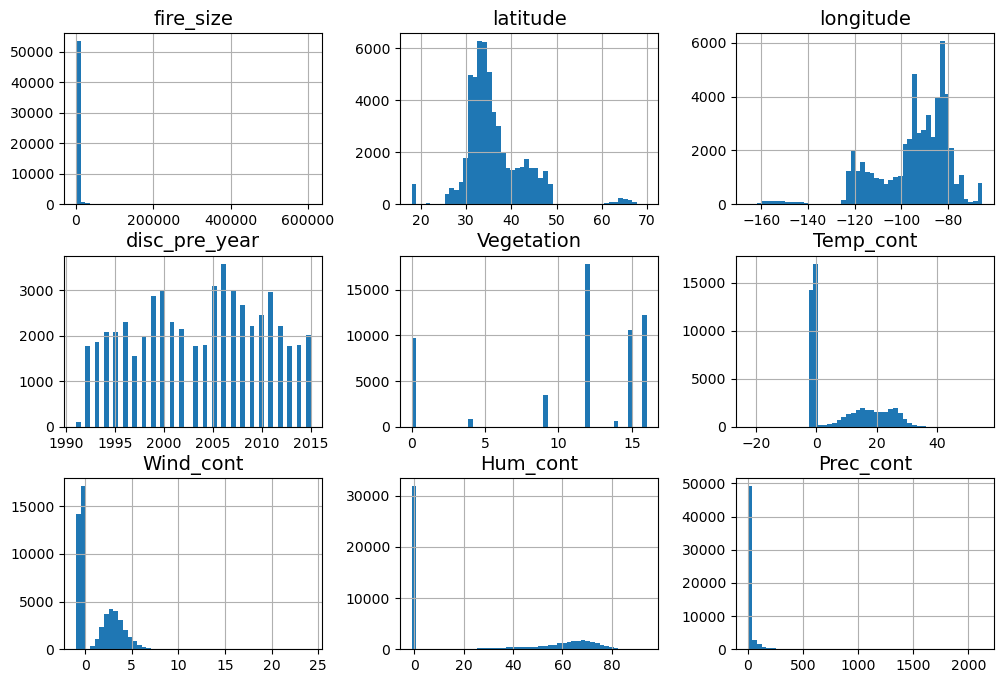

In [14]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

Another useful python package that we can use is `seaborn`.

*Warning! Seaborn can typically be quite slow, especially if you have a large data set or many variables. One simple way to deal with this is to randomly subsample the data, and visualize only a fraction of the data set.*

In [15]:
import seaborn as sns

We can look at how the variables are correlated with one another using the `PairGrid` function

We need both of the lines below to create the plot. The first line just constructs a blank grid of subplots with each row and column corresponding to a numeric value in the data set. The second line draws a bivariate plot on every axis.

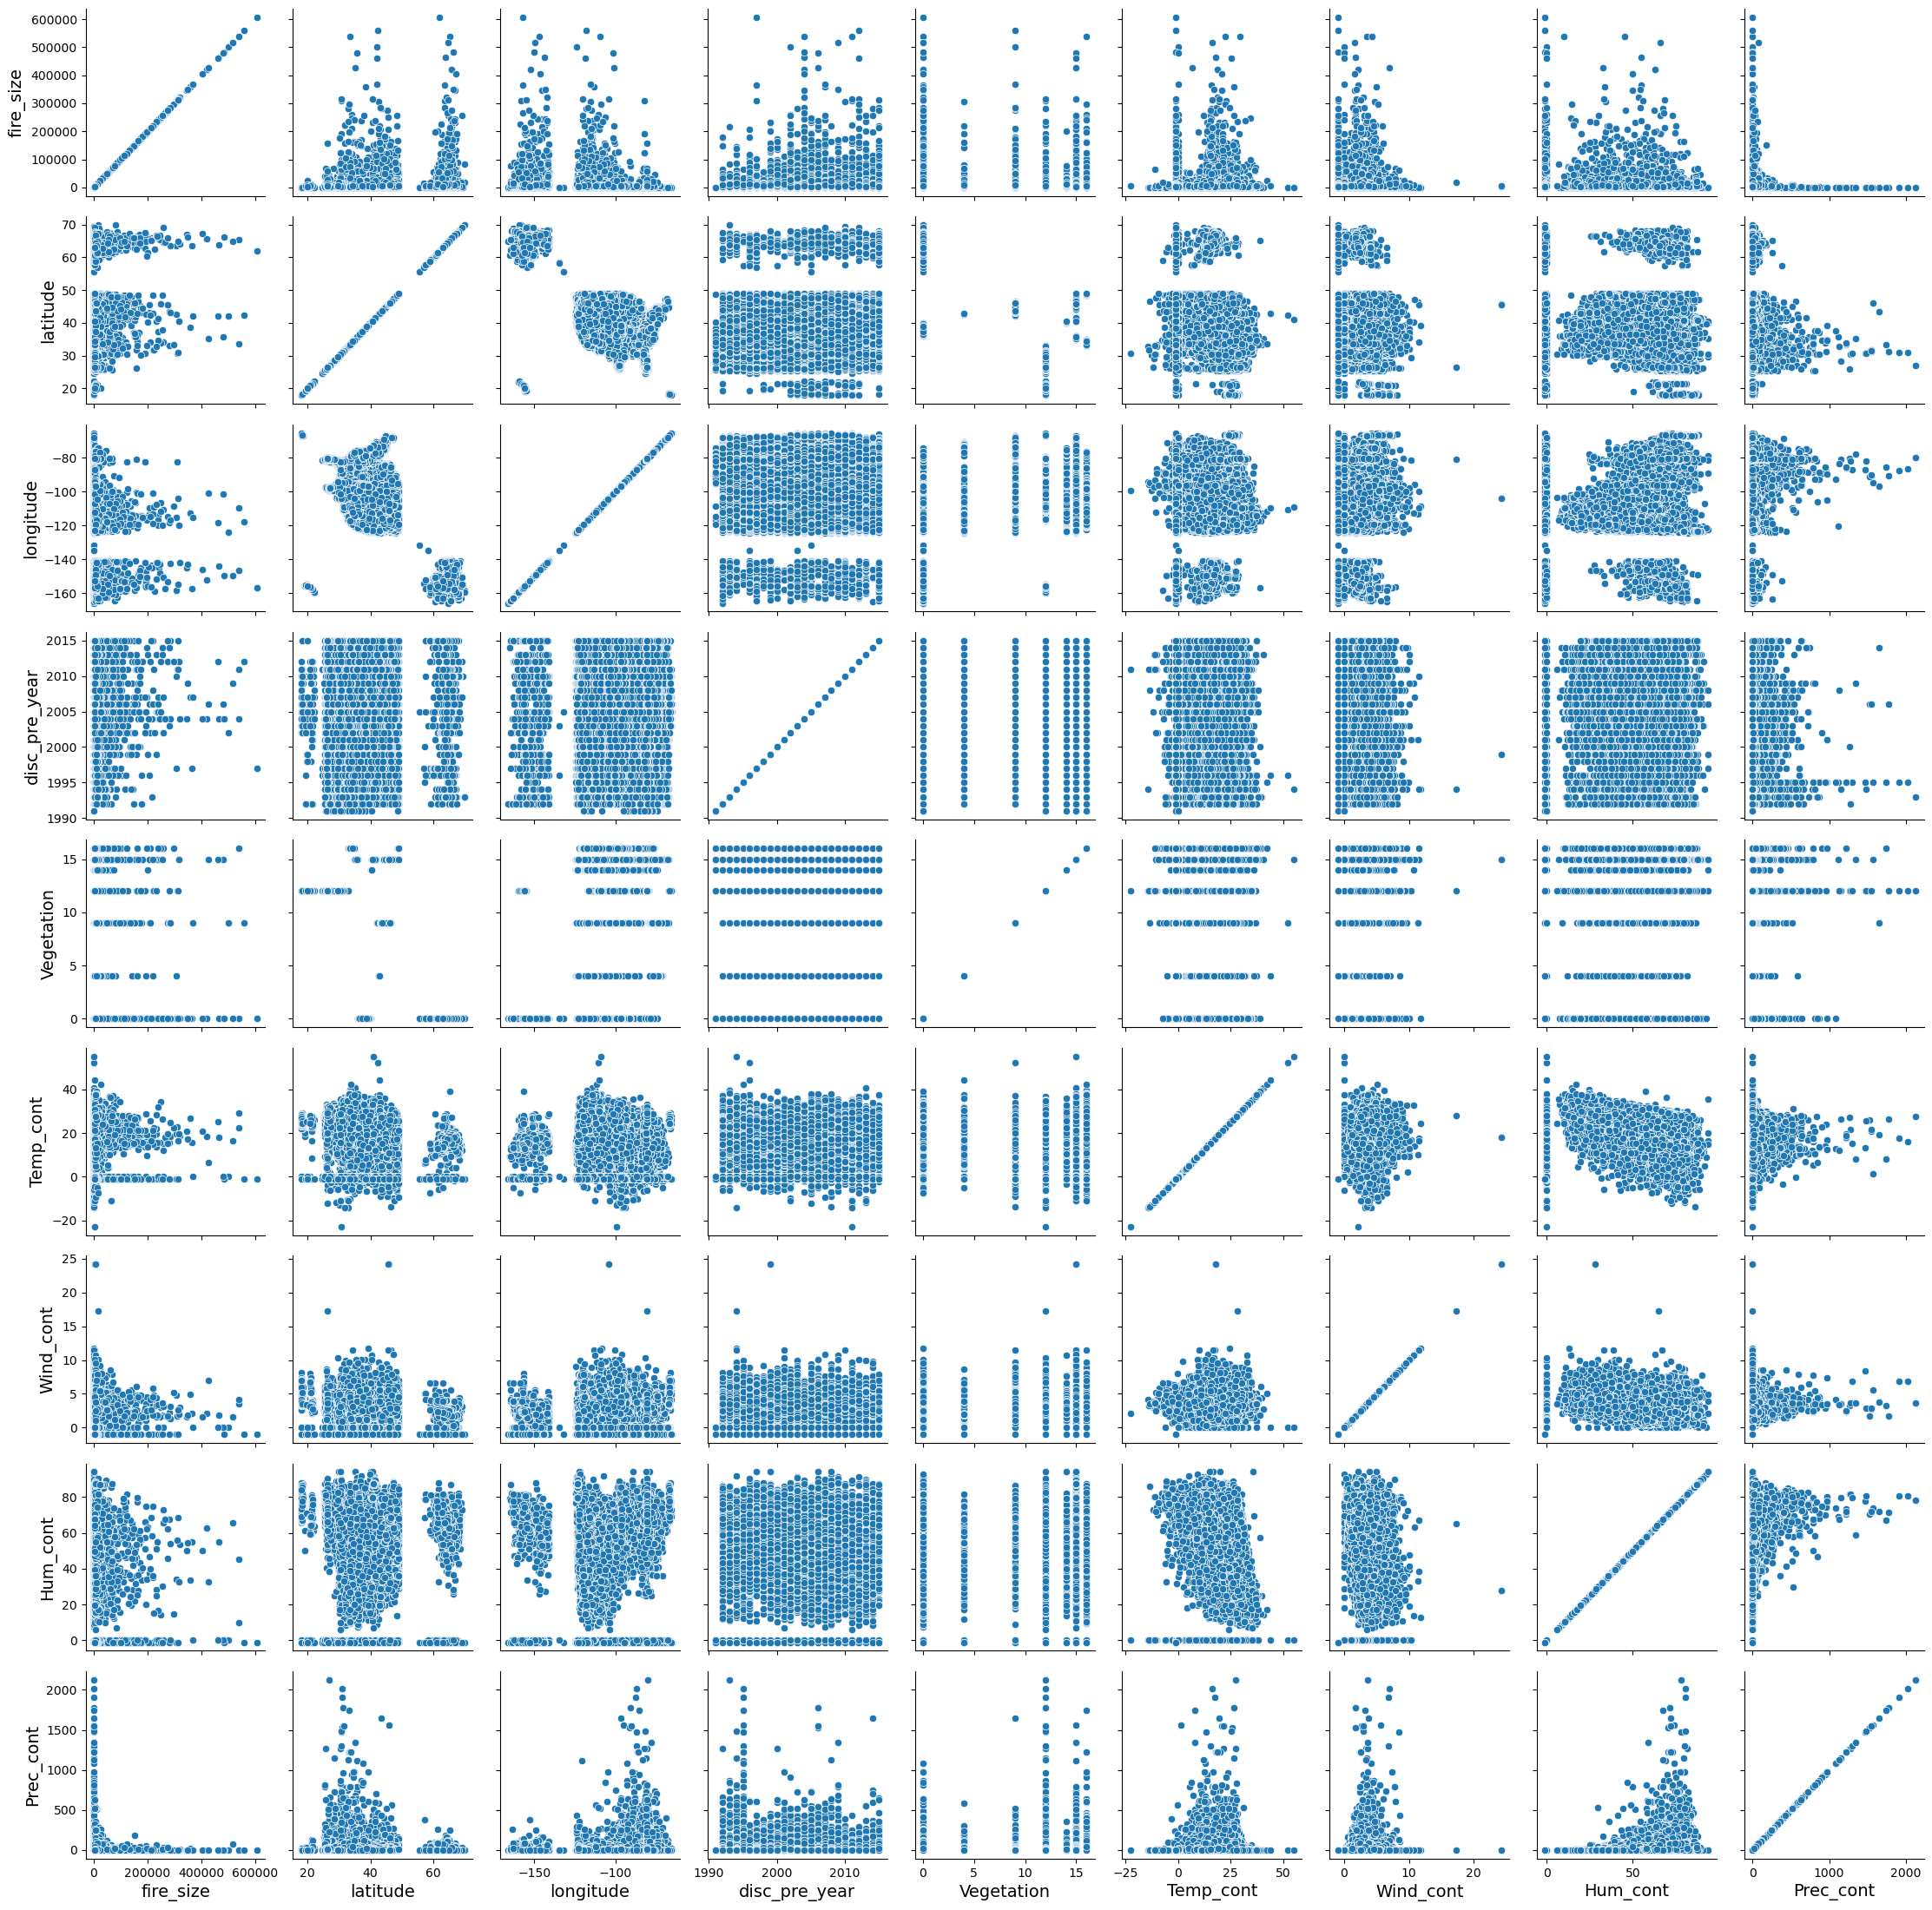

In [16]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

The plots above along the diagnol are not particularly useful, since we are just looking at how the variables are correlated with itself. Another option we can try is to plot the variable's marginal distributions on the diagnols, while plotting joint distributions on the off diagnols.

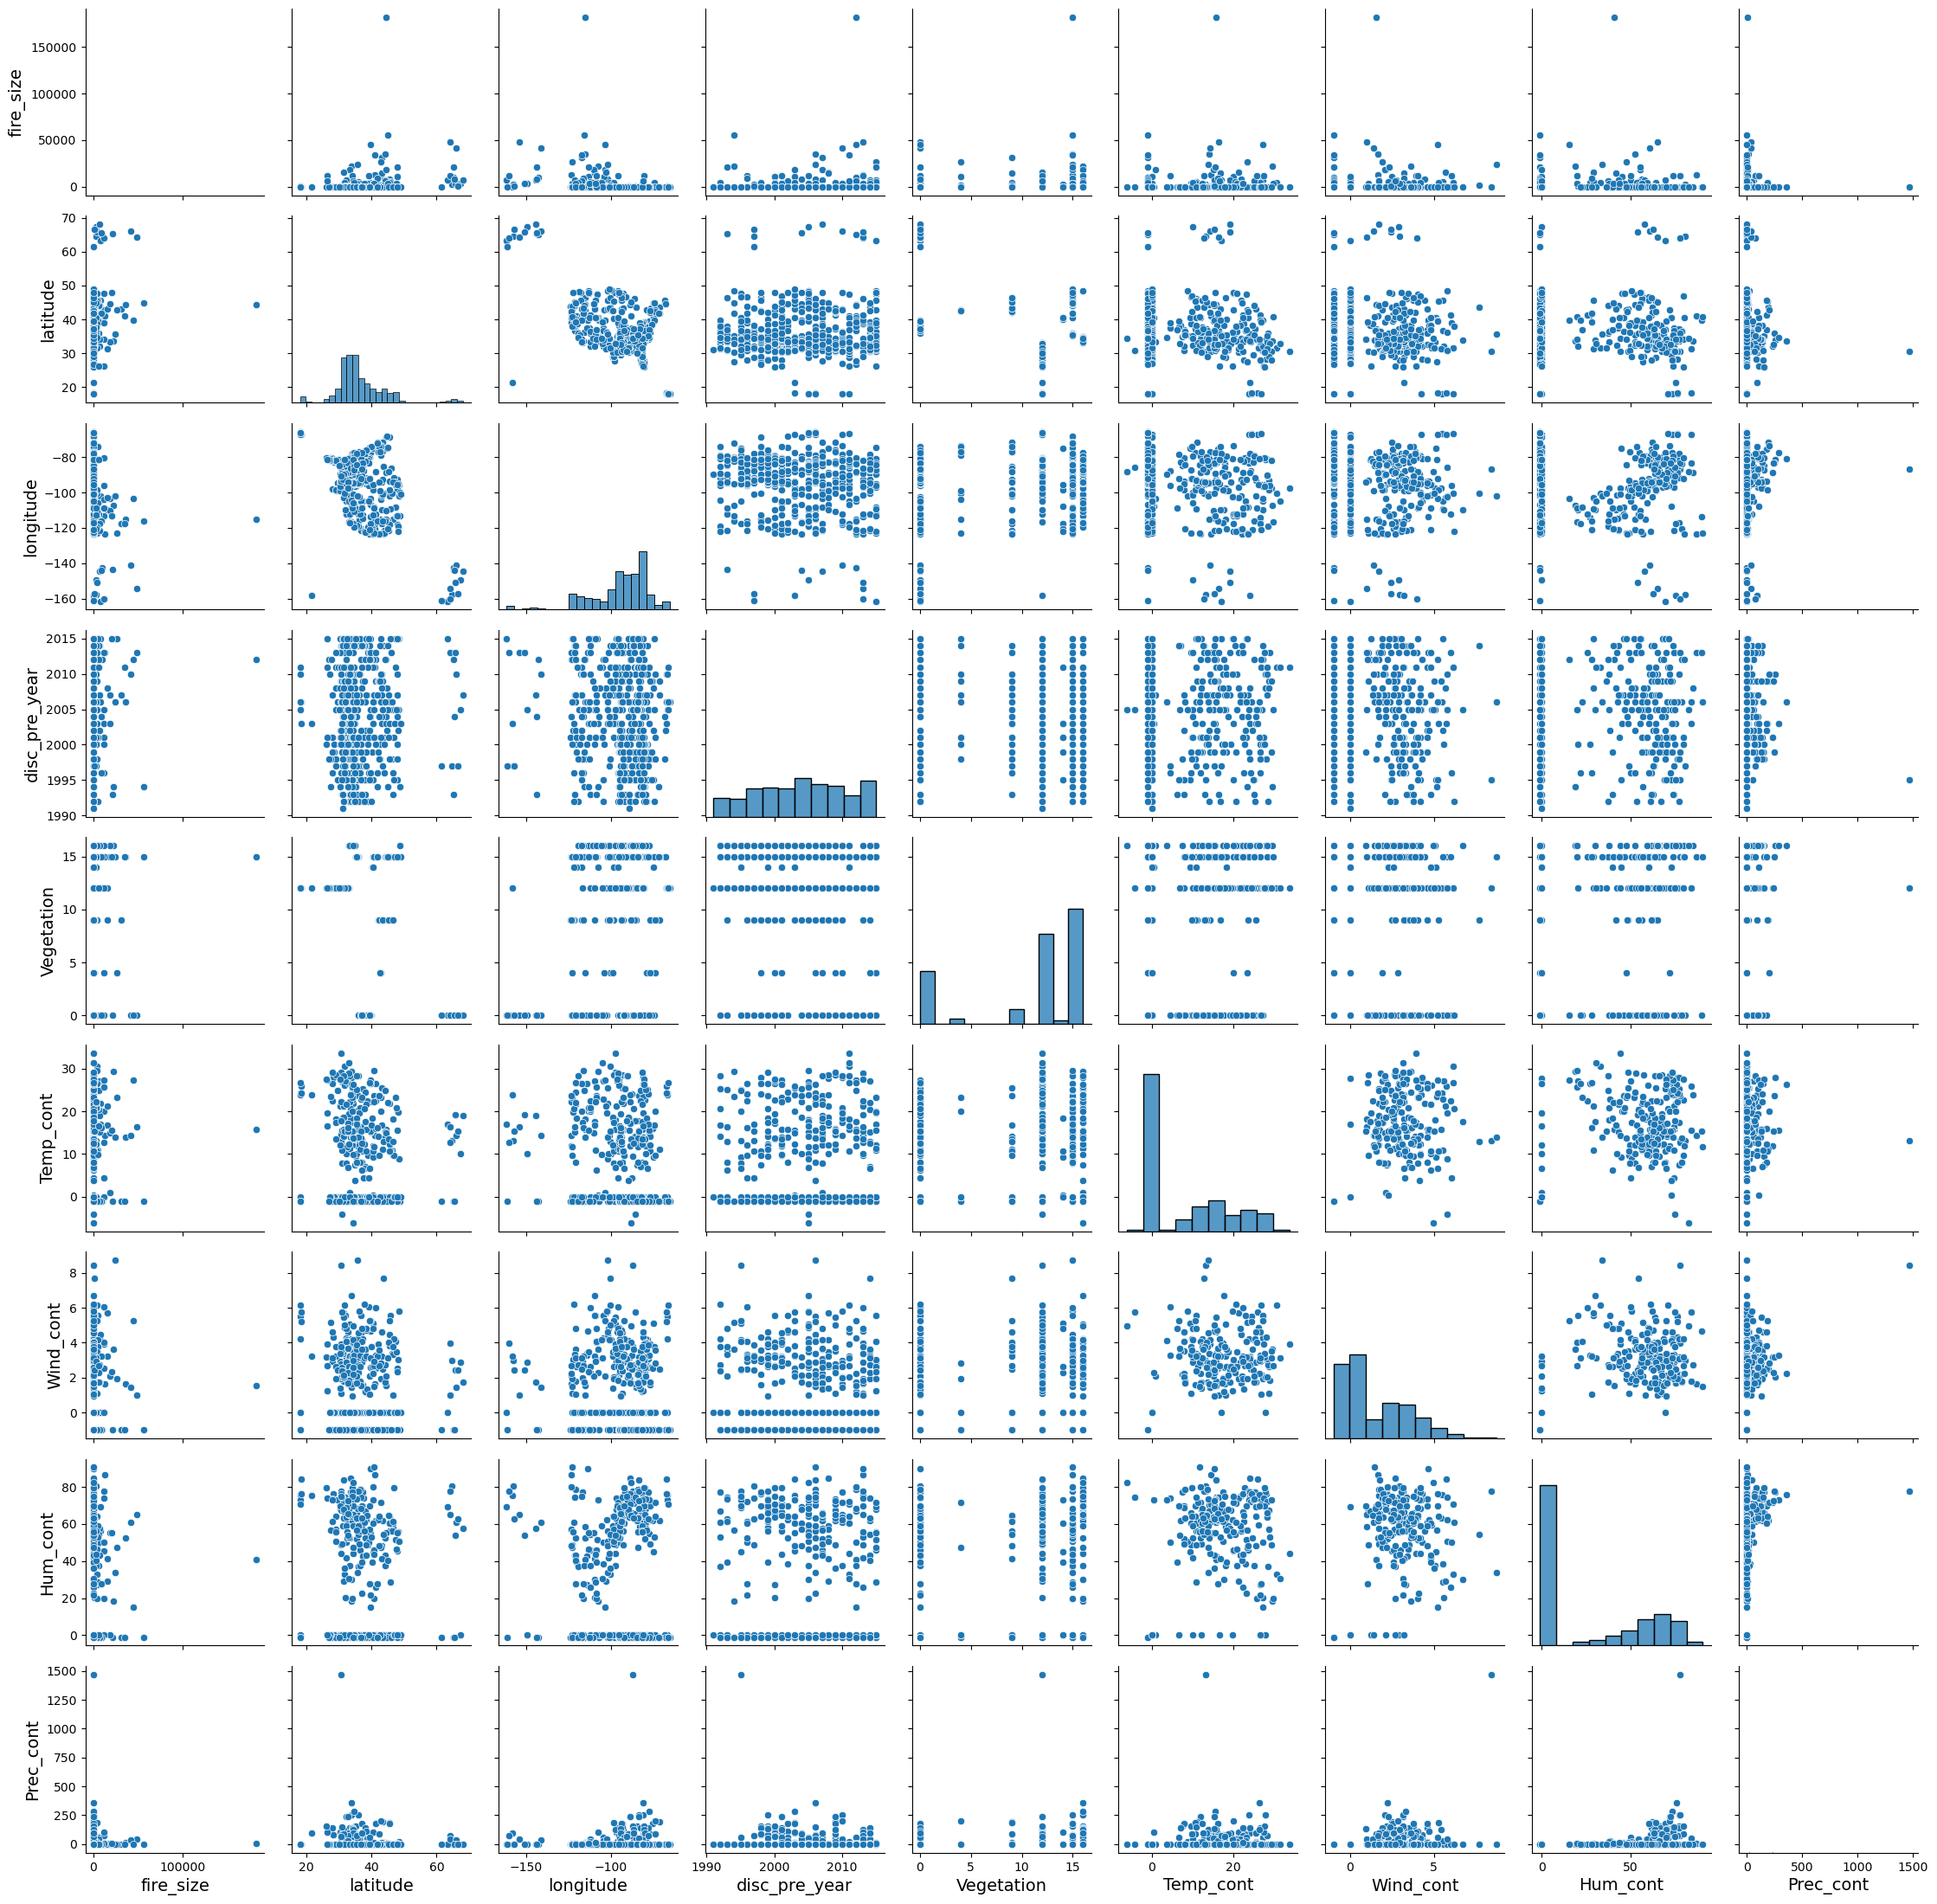

In [21]:
# these lines make this plot, but, beware, they are very slow if we don't first subsample our dataframe
sampled_df = df.sample(n=500)

g = sns.PairGrid(sampled_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## Visualize the data spatially
Since we have latitude and longitude, we can also visualize the spatial distribution of the points in our data set. Looking at fire size, it's clear that the largest fires occur for the most part in the Western US.

/opt/anaconda3/envs/ML4Climate2025/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


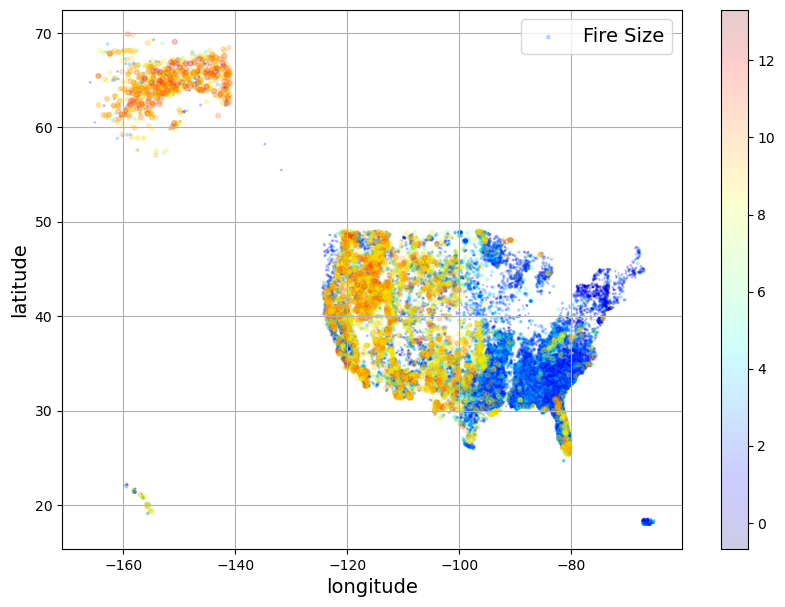

In [22]:
import numpy as np

df.plot(kind='scatter',x='longitude',y='latitude',grid=True,alpha=0.2,
                s = np.log(df["fire_size"]),label = "Fire Size",
                c = np.log(df["fire_size"]),cmap="jet",colorbar = True, legend = True, sharex=False,figsize=(10,7))
plt.show()

## Handling missing/irregular data

The column `putout_time` contains many NaN values, because data on how long it took to put out the fire is not available for every fire. 

First, we can try to understand why data might be missing.

In [23]:
no_putout_time = pd.isna(df['putout_time'])

Let's compare the mean size of the fires which have no data for `putout_time` to the mean size of the fires which do have data:

In [24]:
print("Mean size of fires with NaN for putout_time:")
(df['fire_size'][no_putout_time]).mean()

Mean size of fires with NaN for putout_time:


415.81547412190747

In [25]:
print("Mean size of fires with values for putout_time:")
(df['fire_size'][~no_putout_time]).mean()

Mean size of fires with values for putout_time:


3818.859229537432

This suggests that smaller fires typically don't have data about `putout_time` associated with them.

`putout_time` is currently formatted as string timestamps, rather than floating point numbers, and they are unfortunately not all in the same format. We can see this by printing out the unique values from this column.

In [26]:
unique = df['putout_time'].unique()

In [27]:
unique

array([nan, '0 days 00:00:00.000000000', '1 days 00:00:00.000000000',
       '2 days 00:00:00.000000000', '3 days 00:00:00.000000000',
       '26 days 00:00:00.000000000', '9 days 00:00:00.000000000',
       '4 days 00:00:00.000000000', '18 days 00:00:00.000000000',
       '5 days 00:00:00.000000000', '16 days 00:00:00.000000000',
       '7 days 00:00:00.000000000', '19 days 00:00:00.000000000',
       '12 days 00:00:00.000000000', '6 days 00:00:00.000000000',
       '167 days 00:00:00.000000000', '8 days 00:00:00.000000000',
       '69 days 00:00:00.000000000', '31 days 00:00:00.000000000',
       '36 days 00:00:00.000000000', '29 days 00:00:00.000000000',
       '15 days 00:00:00.000000000', '92 days 00:00:00.000000000',
       '91 days 00:00:00.000000000', '10 days 00:00:00.000000000',
       '11 days 00:00:00.000000000', '63 days 00:00:00.000000000',
       '118 days 00:00:00.000000000', '13 days 00:00:00.000000000',
       '59 days 00:00:00.000000000', '93 days 00:00:00.000000000'

Since the information that we are interested in is the first "word" in each string, we can use the string split method to get the number of days it took to put out a fire, and put this into a new column in our data frame. We also want the variable to be a floating point number (not a string) so that we can use it in our (future) machine learning model.

In [28]:
df['putout_time_float'] = df['putout_time'].str.split().str[0].astype(float)
df['putout_time_float']

0         NaN
1         NaN
2         NaN
3         0.0
4         NaN
         ... 
55362     NaN
55363    22.0
55364     NaN
55365    43.0
55366     NaN
Name: putout_time_float, Length: 55367, dtype: float64

In [29]:
df['putout_time_float'].describe()

count    27477.000000
mean         6.033592
std         27.803757
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       3287.000000
Name: putout_time_float, dtype: float64

There is some correlation between fire size and the time it takes to put out the fire size, but the relationship is not entirely clear.

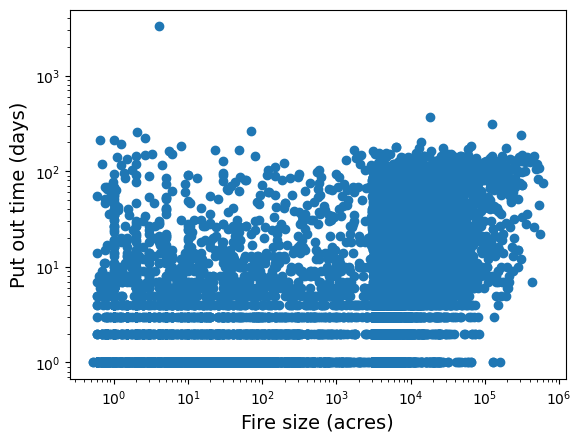

In [30]:
plt.scatter(df['fire_size'],df['putout_time_float'])

plt.xlabel("Fire size (acres)")
plt.ylabel("Put out time (days)")
plt.xscale("log")
plt.yscale("log")

If we look at the meteorological variables (Prec_cont, Wind_cont, Temp_cont, Hum_cont), we also notice that the distributions look strange. This is because they have 0 and -1 for missing values. We can guess this because it's not physically reasonable that these values are negative, or that the Wind_cont, Temp_cont, Hum_cont are exactly 0.0000, especially during fire season.

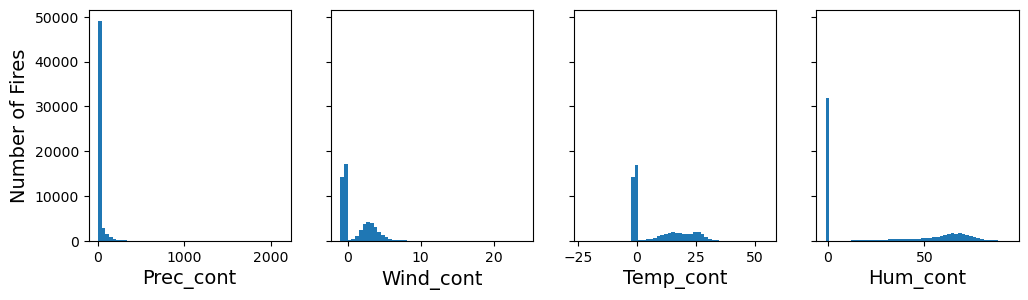

In [31]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
axs[0].hist(df["Prec_cont"], bins=50)
axs[1].hist(df["Wind_cont"], bins=50)
axs[2].hist(df["Temp_cont"], bins=50)
axs[3].hist(df["Hum_cont"], bins=50)
axs[0].set_xlabel("Prec_cont")
axs[1].set_xlabel("Wind_cont")
axs[2].set_xlabel("Temp_cont")
axs[3].set_xlabel("Hum_cont")
axs[0].set_ylabel("Number of Fires")

plt.show()

In [32]:
df["Temp_cont"]

0        24.527961
1        10.448298
2        13.696600
3         0.000000
4        -1.000000
           ...    
55362    13.242324
55363    -1.000000
55364    27.646067
55365    -1.000000
55366    19.016883
Name: Temp_cont, Length: 55367, dtype: float64

In [33]:
df["Temp_cont"] = df["Temp_cont"].replace([0.0000,-1.0000], np.nan)
df["Hum_cont"] = df["Hum_cont"].replace([0.0000,-1.0000], np.nan)
df["Wind_cont"] = df["Wind_cont"].replace([0.0000,-1.0000], np.nan)
df["Prec_cont"] = df["Prec_cont"].replace([-1.0000], np.nan)

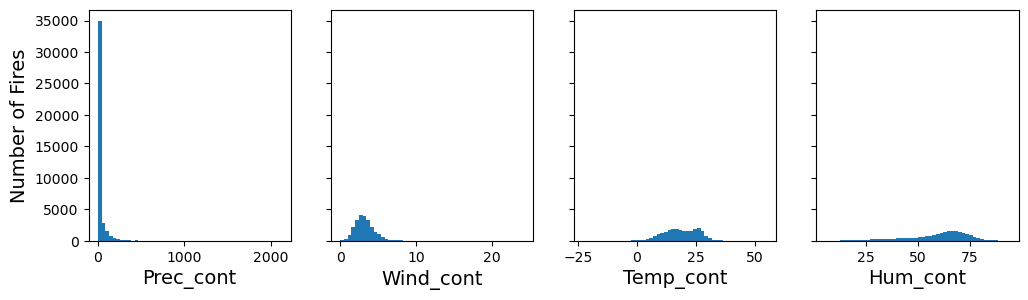

In [34]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
axs[0].hist(df["Prec_cont"], bins=50)
axs[1].hist(df["Wind_cont"], bins=50)
axs[2].hist(df["Temp_cont"], bins=50)
axs[3].hist(df["Hum_cont"], bins=50)
axs[0].set_xlabel("Prec_cont")
axs[1].set_xlabel("Wind_cont")
axs[2].set_xlabel("Temp_cont")
axs[3].set_xlabel("Hum_cont")
axs[0].set_ylabel("Number of Fires")

plt.show()

Now that we have fixed the irregular data, we need to figure out what to do with the NaN values.

One very simple way to deal with these missing data is to just drop all of the rows where there are no values for `putout_time`, using the `dropna()` method:

In [35]:
df_cleaned = df.dropna().copy()

A disadvantage of dropping rows it that we end up with less data, so other approaches such as imputation can be preferable if our data set is small. After removing all of the bad rows, we are down to 10% of our original data set!

In [36]:
print("Number of rows (before removing NaN's): " + str(len(df)))
print("Number of rows (after removing NaN's): " + str(len(df_cleaned)))

Number of rows (before removing NaN's): 55367
Number of rows (after removing NaN's): 5892


In [37]:
df_cleaned['logfiresize']=np.log(df_cleaned['fire_size'])

We can also remove the very high outliers for `putout_time_float` (>99.995%):

In [38]:
q_hi  = df_cleaned['putout_time_float'].quantile(0.99995)
print(q_hi)

df_filtered = df_cleaned[(df_cleaned['putout_time_float'] < q_hi)].dropna().copy()

338.5995000000421


In [39]:
print("Number of rows (before removing outliers): " + str(len(df_cleaned)))
print("Number of rows (after removing outliers): " + str(len(df_filtered)))

Number of rows (before removing outliers): 5892
Number of rows (after removing outliers): 5891


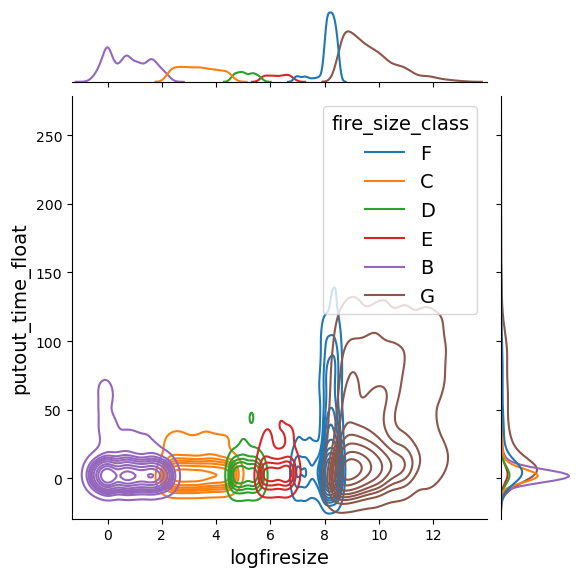

In [40]:
g=sns.jointplot(df_filtered,x ='logfiresize',y='putout_time_float',hue="fire_size_class",kind='kde')

We can also fill the NaN's with a value instead, using the `fillna()` method:

In [41]:
df_filled = df.fillna(0).copy()

Finally, we can interpolate, using the `interpolate()` method:

In [42]:
df_interp = df.interpolate().copy()

Using interpolation or filling missing values can potentially bias our data sets, so it's important to keep in mind what problem we are interested in solving when choosing a method to deal with missing data.

## Feature Scaling
The `sci-kit learn` package has a number of built in functions for scaling variables.

MinMaxScaler scales value between a minimum and maximum. We can set what range we want to end up with.

For a sample x, the MinMaxScaler is calculated as 

~~~
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
~~~

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
latitude_min_max_scaled = min_max_scaler.fit_transform(df[["latitude"]])

The StandardScaler removes the mean and scales to unit variance. For a sample x, the standard scaler is calculated as

~~~
z = (x-u)/s
~~~

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
std_scaler = StandardScaler()
latitude_std_scaled = std_scaler.fit_transform(df[["latitude"]])

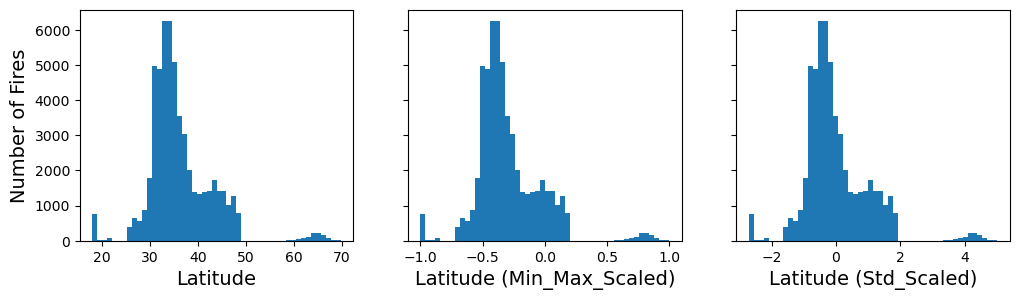

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
axs[0].hist(df["latitude"], bins=50)
axs[1].hist(latitude_min_max_scaled, bins=50)
axs[2].hist(latitude_std_scaled, bins=50)
axs[0].set_xlabel("Latitude")
axs[1].set_xlabel("Latitude (Min_Max_Scaled)")
axs[2].set_xlabel("Latitude (Std_Scaled)")
axs[0].set_ylabel("Number of Fires")

plt.show()

We can also do custom transformations using `sci-kit learn`'s FunctionTransformer method. For example, fire_size is not normally distributed, but rather strongly skewed towards smaller fires. We can log scale this variable using the FunctionTransformer

In [48]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_fire_size = log_transformer.transform(df_filtered[["fire_size"]])

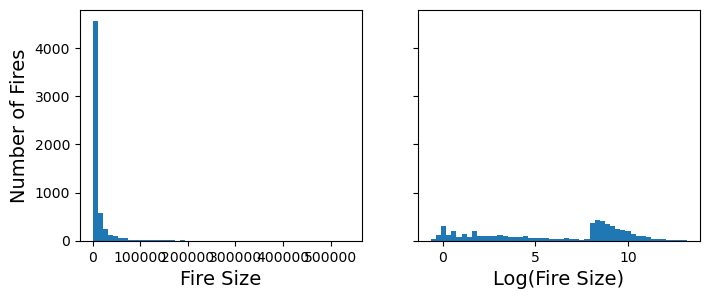

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axs[0].hist(df_filtered["fire_size"], bins=50)
axs[1].hist(log_fire_size, bins=50)
axs[0].set_xlabel("Fire Size")
axs[1].set_xlabel("Log(Fire Size)")
axs[0].set_ylabel("Number of Fires")

plt.show()

## Encoding categorical variables

The `fire_size_class` is a categorical variable (it is a letter between A - G).

In [50]:
fire_size_class = df[["fire_size_class"]]
fire_size_class.head(8)

,fire_size_class
0,C
1,B
2,C
3,B
4,B
5,B
6,B
7,B


We can also check if our data set is balanced or not, by printing out the number of samples of each class in our data set.

In [56]:
fire_size_class_counts = df["fire_size_class"].value_counts()
print(fire_size_class_counts)

fire_size_class
B    36522
C    10811
G     3972
F     1968
D     1394
E      700
Name: count, dtype: int64


There are several different ways that we can encode this categorical variable for machine learning models. One is using the OrdinalEncoder function from `sci-kit learn`. This function will transform categories (B,C,D,E,...) to an integer label (0,1,2,3,...).  

We will end up with a single column per original feature (or variable) in our data set. 

OrdinalEncoder can be useful if our categories have a particular ordering to them (like fire size class does). However, it might not be a good choice for a feature like the `state` in which a fire occured, since we don't have a particular ordering to the values in our data set in that case.

In [57]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
fire_size_class_encoded = ordinal_encoder.fit_transform(fire_size_class)

In [58]:
fire_size_class_encoded[:8]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [59]:
ordinal_encoder.categories_

[array(['B', 'C', 'D', 'E', 'F', 'G'], dtype=object)]

An alternative way that we can encode a categorical variable is using the OneHotEncoder function from `sci-kit learn`. This function converts each category into a separate binary column. For example, a sample that is class B, would be one hot encoded as 
~~~
[1, 0, 0, 0, 0, 0]
~~~

or for a sample that is a fire of class E, it would be encoded as 
~~~
[0, 0, 0, 1, 0, 0]
~~~

We will end up with as many columns as we have classes in our data set. For the fire_size_class variable, this would add 6 columns, since there are 6 possible classes represented in our data set.

This is best to use when our categorical variables are nominal (unordered), and is best for many of the types of models that assume inputs are numerical and unstructured (linear models, neural networks), which we will discuss later in the course.

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
fire_size_class_hot = cat_encoder.fit_transform(fire_size_class)

In [61]:
fire_size_class_hot

<55367x6 sparse matrix of type '<class 'numpy.float64'>'
	with 55367 stored elements in Compressed Sparse Row format>

In [62]:
fire_size_class_hot.toarray()

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [63]:
cat_encoder.categories_

[array(['B', 'C', 'D', 'E', 'F', 'G'], dtype=object)]

## Creating a training, validation, and test data set

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df_filtered.columns

Index(['fire_size', 'fire_size_class', 'latitude', 'longitude', 'putout_time',
       'disc_pre_year', 'Vegetation', 'Temp_cont', 'Wind_cont', 'Hum_cont',
       'Prec_cont', 'putout_time_float', 'logfiresize'],
      dtype='object')

In [66]:
y = df_filtered['fire_size']

features = ["latitude","longitude","Vegetation","Temp_cont","Wind_cont","Hum_cont","Prec_cont"]
X = df_filtered[features].copy()

In [67]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [68]:
print(X_train.shape,X_val.shape,X_test.shape)

(3534, 7) (1178, 7) (1179, 7)
